In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.mnist
import kerastuner as kt
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

# Data Preprocessing

In [4]:
class_names = ["dog",
               "airplane",
              "automobile",
              "bird",
              'cat',
              "deer",
              "frog",
              "horse",
              "ship",
              "truck"]


In [5]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0

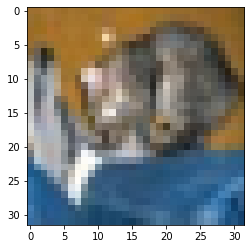

In [5]:
plt.imshow(x_test[0])

# Basic NN Model

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [32,32,3]))
model.add(keras.layers.Dense(units = 20,
                             activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10))
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                61460     
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs =5)


Epoch 1/5
1563/1563 [==============================] - 2s 918us/step - loss: 7.6473 - accuracy: 0.1008
Epoch 2/5
1563/1563 [==============================] - 1s 881us/step - loss: 7.7916 - accuracy: 0.1027
Epoch 3/5
1563/1563 [==============================] - 1s 893us/step - loss: 7.7548 - accuracy: 0.1009
Epoch 4/5
1563/1563 [==============================] - 1s 900us/step - loss: 7.3240 - accuracy: 0.1006
Epoch 5/5
1563/1563 [==============================] - 1s 925us/step - loss: 7.2645 - accuracy: 0.0991


In [10]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 677us/step - loss: 6.7813 - accuracy: 0.1000


# Basic CNN Model

In [20]:
model1 = keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters =16,
                                kernel_size =(3,3),
                                padding ='same',
                                activation = "relu",
                                input_shape = [32,32,3]))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(units = 20,
                             activation = 'relu'))

model1.add(keras.layers.Dense(10))
model.summary()
model1.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                61460     
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 61,670
Trainable params: 61,670
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.fit(x_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 8.4638 - accuracy: 0.0983
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 8.2414 - accuracy: 0.1058
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 8.2390 - accuracy: 0.1002
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 8.2389 - accuracy: 0.1070
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 10.1165 - accuracy: 0.1049


In [13]:
test_loss, test_accuracy = model1.evaluate(x_test,y_test)

313/313 [==============================] - 0s 673us/step - loss: 6.7814 - accuracy: 0.1000


# CNN Model With Max Pooling

In [ ]:
#model1.add(tf.keras.layers.Dropout(0.2))

In [30]:
model2 = keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters =16,
                                kernel_size =(3,3),
                                padding ='same',
                                activation = "relu",
                                input_shape = [32,32,3]))
model2.add(tf.keras.layers.MaxPool2D(pool_size =2,
                                   strides =2,
                                   padding = 'valid'))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(units = 20,
                             activation = 'relu'))

model2.add(keras.layers.Dense(10))
model2.summary()
model2.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                81940     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
Total params: 82,598
Trainable params: 82,598
Non-trainable params: 0
_________________________________________________________________


In [31]:
model2.fit(x_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4810 - accuracy: 0.1003
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.1000


In [18]:
test_loss, test_accuracy = model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


# CNN with Max Pooling, Padding

In [33]:
model3 = keras.Sequential()
model3.add(tf.keras.layers.Conv2D(filters =16,
                                kernel_size =(3,3),
                                padding ='same',
                                activation = "relu",
                                input_shape = [32,32,3]))
model3.add(tf.keras.layers.MaxPool2D(pool_size =2,
                                   strides =2,
                                   padding = 'valid'))

model3.add(tf.keras.layers.Conv2D(filters = (32),
                                kernel_size = 3,
                                padding = "same",
                                activation = "relu"))
model3.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                   strides =2,
                                   padding = 'valid'))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(units = 20,
                             activation = 'relu'))

model3.add(keras.layers.Dense(10))
model3.summary()
model3.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                40980     
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [34]:
model3.fit(x_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 16s 10ms/step - loss: 2.5373 - accuracy: 0.0846
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.3026 - accuracy: 0.0844
Epoch 3/5
1563/1563 [==============================] - 15s 10ms/step - loss: 2.3026 - accuracy: 0.0844
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3026 - accuracy: 0.0844
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 2.3026 - accuracy: 0.0844


In [35]:
test_loss, test_accuracy = model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 2.3026 - accuracy: 0.1000


# CNN with MaxPool, Padding, Dropout

In [36]:
model4 = keras.Sequential()
model4.add(tf.keras.layers.Conv2D(filters =16,
                                kernel_size =(3,3),
                                padding ='same',
                                activation = "relu",
                                input_shape = [32,32,3]))
model4.add(tf.keras.layers.MaxPool2D(pool_size =2,
                                   strides =2,
                                   padding = 'valid'))

model4.add(tf.keras.layers.Conv2D(filters = (32),
                                kernel_size = 3,
                                padding = "same",
                                activation = "relu"))
model4.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                   strides =2,
                                   padding = 'valid'))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(units = 20,
                             activation = 'relu'))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(keras.layers.Dense(10))
model4.summary()
model4.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                40980     
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)               

In [ ]:
model4.fit(x_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 14s 9ms/step - loss: 3.5700 - accuracy: 0.0974
Epoch 2/5
1563/1563 [==============================] - 13s 9ms/step - loss: 3.7821 - accuracy: 0.0978
Epoch 3/5
 822/1563 [==============>...............] - ETA: 6s - loss: 2.3026 - accuracy: 0.1005

In [ ]:
test_loss, test_accuracy = model4.evaluate(x_test,y_test)

# CNN with Batch Normalization Comparison

In [9]:
model5 = keras.Sequential()
model5.add(tf.keras.layers.Conv2D(filters =16,
                                kernel_size =(3,3),
                                padding ='same',
                                activation = "relu",
                                input_shape = [32,32,3]))
model5.add(BatchNormalization())
model5.add(tf.keras.layers.MaxPool2D(pool_size =2,
                                   strides =2,
                                   padding = 'valid'))

model5.add(tf.keras.layers.Conv2D(filters = (32),
                                kernel_size = 3,
                                padding = "same",
                                activation = "relu"))
model5.add(BatchNormalization())
model5.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                   strides =2,
                                   padding = 'valid'))

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(units = 20,
                             activation = 'relu'))
model5.add(tf.keras.layers.Dropout(0.2))
model5.add(keras.layers.Dense(10))
model5.summary()
model5.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)             

In [10]:
model5.fit(x_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 25s 15ms/step - loss: 4.6235 - accuracy: 0.1383
Epoch 2/5
1563/1563 [==============================] - 25s 16ms/step - loss: 2.8590 - accuracy: 0.1301
Epoch 3/5
1563/1563 [==============================] - 24s 16ms/step - loss: 2.4081 - accuracy: 0.1067
Epoch 4/5
1563/1563 [==============================] - 25s 16ms/step - loss: 2.3748 - accuracy: 0.1265
Epoch 5/5
1563/1563 [==============================] - 26s 16ms/step - loss: 2.4588 - accuracy: 0.1415


In [12]:
test_loss, test_accuracy = model5.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3021 - accuracy: 0.1082


# Addition of Batch Normalization increased both Accuracy and Test Set.